In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss

In [2]:
data = pd.read_csv('gbm-data.csv')
y = data.values[:,0]
x = data.values[:,1:]

In [3]:
x.shape

(3751, 1776)

In [4]:
y.shape

(3751,)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def my_log_loss(y,z):
    return -y*np.log(z)-(1-y)*np.log(1-z)

In [7]:
def sigmoid(y):
    return 1.0/(1.0 + np.exp(-y))

In [8]:
from sklearn.cross_validation import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.8,
                                                    random_state=241)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,
                                     learning_rate=0.2)
clf.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613           15.51s
         2           1.1715           15.19s
         3           1.1009           14.92s
         4           1.0529           14.99s
         5           1.0130           14.85s
         6           0.9740           14.74s
         7           0.9475           14.52s
         8           0.9197           14.47s
         9           0.8979           14.33s
        10           0.8730           14.20s
        20           0.7207           13.17s
        30           0.6055           12.47s
        40           0.5244           11.85s
        50           0.4501           11.27s
        60           0.3908           10.69s
        70           0.3372           10.09s
        80           0.3009            9.52s
        90           0.2603            8.96s
       100           0.2327            8.38s
       200           0.0835            2.78s


GradientBoostingClassifier(init=None, learning_rate=0.2, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=241, subsample=1.0,
              verbose=True, warm_start=False)

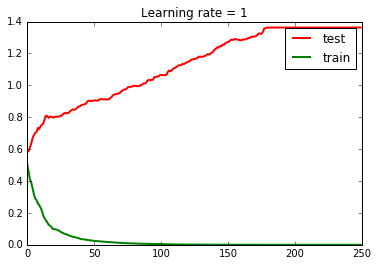

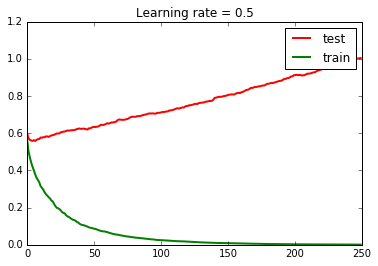

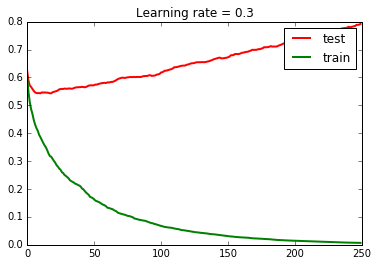

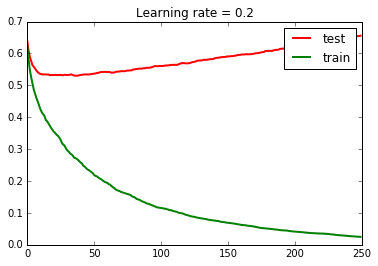

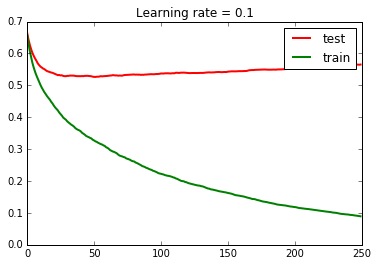

In [14]:
test_deviances = dict()
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241,
                                     learning_rate=learning_rate)
    clf.fit(X_train,y_train)
    
    train_deviance = np.zeros((clf.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_train)):
        train_deviance[i] = log_loss(y_train, sigmoid(y_pred))
    
    test_deviance = np.zeros((clf.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        test_deviance[i] = log_loss(y_test, sigmoid(y_pred))
        
    test_deviances[learning_rate] = test_deviance
        
    plt.figure()
    plt.plot(test_deviance, 'r', linewidth=2)
    plt.plot(train_deviance, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title('Learning rate = {0}'.format(learning_rate))
    plt.show()

In [17]:
min_it = np.argmin(test_deviances[0.2])
min_deviance = test_deviances[0.2][min_it]
min_it += 1
print('{0:.2f} {1}'.format(min_deviance, min_it))

0.53 37


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_clf = RandomForestClassifier(n_estimators=36, random_state=241)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [20]:
y_pred = rf_clf.predict_proba(X_test)

In [21]:
print("{0:.2f}".format(log_loss(y_test, y_pred)))

0.54
